# Creating Non Rectilinear Grids from Scratch<a id="top"></a>

Download the Notebook [here](Creating_Non_Rectiilinear_Grids_From_Scratch.ipynb)

# Table of Contents

- [Preparing the notebook](#prepare)
- [Curvilinear Grid](#curv)
  - [Load in data](#load_curv)
  - [Prepare 2D "axes"](#axes_curv)
  - [Create Curvilinear Grid](#grid_curv)
  - [Applying Grid To Data](#data_curv)
  - [Regrid to T42 Gaussian Grid](#regrid_curv)
  - [Display Results](#plot_curv)
- [Generic Grid](#gen)
  - [Load in data](#load_gen)
  - [Prepare "axes"](#axes_gen)
  - [Create Generic Grid](#grid_gen)
  - [Applying Grid To Data](#data_gen)
  - [Display Results](#plot_gen)


[Back To Top](#top)

# Preparing The Notebook<a id="prepare"></a>

In [1]:
# Prepare the notebook elements
import requests
def download(fnm):
    r = requests.get("https://uvcdat.llnl.gov/cdat/sample_data/%s" % fnm,stream=True)
    with open(fnm,"wb") as f:
        for chunk in r.iter_content(chunk_size=1024):
            if chunk:  # filter local_filename keep-alive new chunks
                f.write(chunk)
                
download("sampleCurveGrid4.nc")
download("sampleGenGrid3.nc")

# Curvilinear Grids<a id="curv"></a>

In this section we will create a curvilinear grid from raw data and regrid it to T42 Gaussian Grid

[Back To Top](#top)

## Load the data<a id="load_curv"></a>

[Back To Top](#top)

In [2]:
import cdms2

fnm = "sampleCurveGrid4.nc"
f = cdms2.open(fnm)
data = f("sample").filled() # Get data and forget all about it (pure numpy)
lat = f("lat").filled() # latitude coordinates
lon = f("lon").filled() # longitude coords
blon = f("bounds_lon").filled() # longitude vertices
blat = f("bounds_lat").filled() #latitude vertices

## Creating latitude and longitude two dimensional "axes"<a id="axes_curv"></a>

Let's prepare the "axes" for our data (i.e 2D lat lon)

[Back To Top](#top)

In [3]:
lat_axis = cdms2.coord.TransientAxis2D(lat)
lat_axis.setBounds(blat)

lon_axis = cdms2.coord.TransientAxis2D(lon)
lon_axis.setBounds(blon)

## Creating two dimensional curvilinear grid<a id="grid_curv"></a>

Let's prepare the "axes" for our data (i.e 2D lat lon)

[Back To Top](#top)

In [4]:
# Now let's create the grid
grid = cdms2.hgrid.TransientCurveGrid(lat_axis,lon_axis)

## Applying grid to raw data<a id="data_curv"></a>

Let's apply the grid to our data

[Back To Top](#top)

In [5]:
data = cdms2.MV2.array(data)
data.setAxisList(grid.getAxisList())
data.setGrid(grid)

## Converting to another grid<a id="regrid_curv"></a>

Let's regrid our data to a T42 grid

[Back To Top](#top)

In [6]:
regrid_data = data.regrid(cdms2.createGaussianGrid(128),regridTool="esmf",regridMethod="conserve")

/Users/doutriaux1/anaconda2/envs/2.12-nox/lib/python2.7/site-packages/regrid2/mvGenericRegrid.py:206: RuntimeWarning: invalid value encountered in greater
  (dstDataMaskFloat > 1 - EPS), numpy.int32)


## Display results<a id="plot_curv"></a>

let's plot the raw data and the regrided data

[Back To Top](#top)

/Users/doutriaux1/anaconda2/envs/2.12-nox/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/doutriaux1/anaconda2/envs/2.12-nox/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


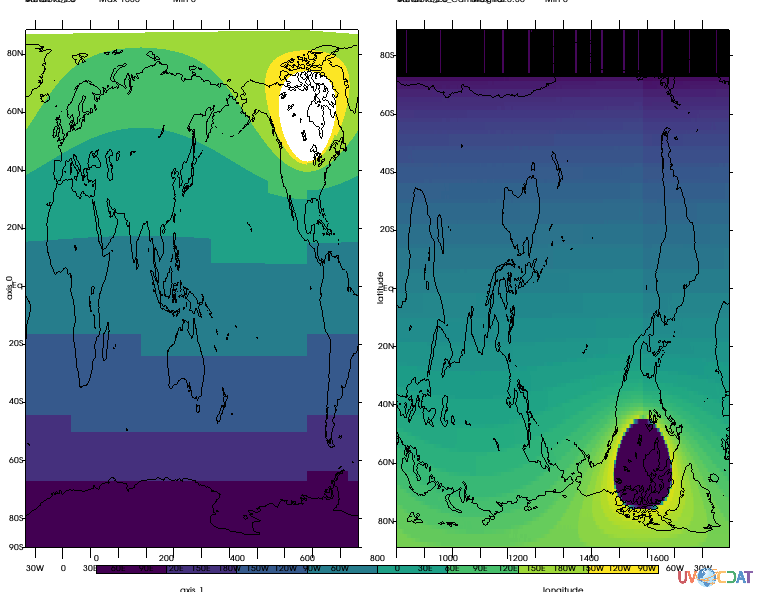

In [7]:
# And llet's plot it to be sure it worked
import vcs
import EzTemplate

M = EzTemplate.Multi(rows=1,columns=2)

# Raw data
mesh = vcs.createmeshfill()
x=vcs.init(bg=True)
x.plot(data,mesh,M.get(row=0,column=0))

# Regridded data
x.plot(regrid_data,M.get(row=0,column=1))

# Generic Grids<a id="gen"></a>

In this section we will create a genric grid from raw data and regrid it to T42 Gaussian Grid

[Back To Top](#top)

## Load the data<a id="load_gen"></a>

[Back To Top](#top)

In [8]:
import cdms2

fnm = "sampleGenGrid3.nc"
f = cdms2.open(fnm)
data = f("sample").filled() # Get data and forget all about it (pure numpy)
lat = f("lat").filled() # latitude coordinates
lon = f("lon").filled() # longitude coords
blon = f("bounds_lon").filled() # longitude vertices
blat = f("bounds_lat").filled() #latitude vertices

## Creating latitude and longitude  "axes"<a id="axes_gen"></a>

Let's prepare the "axes" for our data (i.e 1D lat lon)

[Back To Top](#top)

In [9]:
#Ncells = len(lat)
#iaxis = cdms2.coord.TransientVirtualAxis("cell", Ncells)
lat_axis = cdms2.auxcoord.TransientAuxAxis1D(lat)
lat_axis.setBounds(blat)

lon_axis = cdms2.auxcoord.TransientAuxAxis1D(lon)
lon_axis.setBounds(blon)

## Creating Unidimensional Generic Grid<a id="grid_gen"></a>

Let's prepare the "axes" for our data (i.e 2D lat lon)

[Back To Top](#top)

In [10]:
# Now let's create the grid
grid = cdms2.gengrid.TransientGenericGrid(lat_axis,lon_axis)

## Applying grid to raw data<a id="data_gen"></a>

Let's apply the grid to our data

[Back To Top](#top)

In [11]:
data = cdms2.MV2.array(data)
data.setAxisList(grid.getAxisList())
data.setGrid(grid)

## Display results<a id="plot_gen"></a>

let's plot the raw data and the regrided data

[Back To Top](#top)

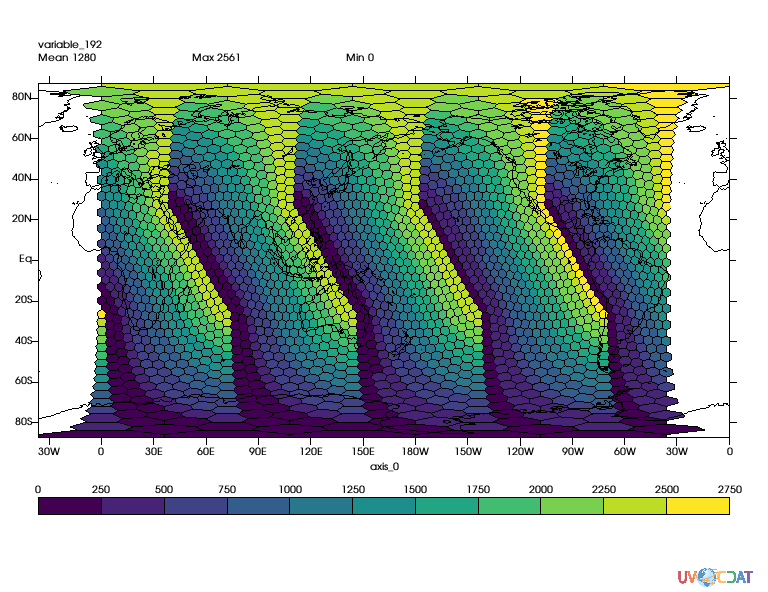

In [12]:
# And llet's plot it to be sure it worked
import vcs

# Raw data
mesh = vcs.createmeshfill()
mesh.mesh = True
x=vcs.init(bg=True)
x.plot(data,mesh)

[Back To Top](#top)